In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#INTRODUCIENDO DATOS DE ENTRENAMIENTO
F, N = [int(x) for x in input().split()]
X, Y=[],[]
for i in range(N):
    data = list(map(float, input().split())) # Leemos la lista.
    X.append(data[:F])
    Y.append(data[F])
X = np.asarray(X)
X = np.insert(X,0,1,axis=1)
Y = np.asarray(Y)
Y = np.asarray(Y).reshape(N,1)
print(X)
print(Y)
#INTRODUCIENDO DATOS DE TEST
T = int(input())
Xp = []
for i in range(T):
    data = list(map(float, input().split())) # Leemos la lista.
    Xp.append(data[:F])
Xp = np.asarray(Xp)
Xp = np.insert(Xp,0,1,axis=1)
print(Xp)

2 7
0.18 0.89 109.85
1.0 0.26 155.72
0.92 0.11 137.66
0.07 0.37 76.17
0.85 0.16 139.75
0.99 0.41 162.6
0.87 0.47 151.77
[[1.   0.18 0.89]
 [1.   1.   0.26]
 [1.   0.92 0.11]
 [1.   0.07 0.37]
 [1.   0.85 0.16]
 [1.   0.99 0.41]
 [1.   0.87 0.47]]
[[109.85]
 [155.72]
 [137.66]
 [ 76.17]
 [139.75]
 [162.6 ]
 [151.77]]
4
0.49 0.18
0.57 0.83
0.56 0.64
0.76 0.18
[[1.   0.49 0.18]
 [1.   0.57 0.83]
 [1.   0.56 0.64]
 [1.   0.76 0.18]]


In [3]:
def reg_lin_Mat(X,Y):
    """
    X: Matriz de dimensiones (n,k+1) primera columna de 1
    Y: Vector de salidas
    """
    return np.linalg.inv(X.T@X)@(X.T@Y)

In [4]:
#resolviendo de forma analitica
Theta = reg_lin_Mat(X,Y)
print(Theta)
Yp = Xp@Theta 
Yp = np.around(Yp,2)
for i in range(T):
    print(float(Yp[i]))

[[52.41149905]
 [90.69331739]
 [46.46296549]]
105.21
142.67
132.94
129.7


In [5]:
#CREANDO LA FUNCION DE COSTO EN BASE AL ERROR CUADRATICO MEDIO (J = 1/2*1/n*E.T*E)
#donde E es el vector de error  (Y - Ys)
#n es el numero de datos de entrenamiento
def FuncionCosto (X,Y,Theta):
    Ys = X@Theta
    E = Ys - Y
    J = 0.5*(1/Y.shape[0])*(E.T@E)
    return J

In [6]:
#CREANDO EL GRADIENTE DE LA FUNCION DE COSTO
def GradFuncionCosto (X,Y,Theta):
    Ys = X@Theta
    E = Ys - Y
    Jgrad = (1/Y.shape[0])*(X.T@E)
    return Jgrad

In [7]:
#resolviendo con gradient descent
def gradient_descent (X,Y,alpha=0.001,iteracion=10**5):
    Theta = np.random.randn(X.shape[1]).reshape(X.shape[1],1) #empezando con parametros aleatorios
    J_draw = []
    for i in range(iteracion):
        J_costo = FuncionCosto(X,Y,Theta)      #CALCULO DE LA FUNCION DE COSTO
        J_grad = GradFuncionCosto(X,Y,Theta)    #CALCULO DEL GRADIENTE
        Theta = Theta - alpha*J_grad   #ACTUALIZACION DE PARAMETROS
        J_draw.append(float(J_costo))  #ALMACENAMIENTO DE VALORES DE LA FUNCION DE COSTO
    print('Valores de los parametros: \n',Theta)    
    print('Ultimo valor de la funcion de costo:  ',J_draw[iteracion-1])
    plt.title('GRAFICA DE GRADIENTE DESCENDENTE')
    plt.xlabel('NRO. ITERACION')
    plt.ylabel('FUNCION DE COSTO:  J')
    plt.plot(range(iteracion),J_draw,'-r')
    plt.grid()
    return Theta

Valores de los parametros: 
 [[52.41149905]
 [90.69331738]
 [46.46296548]]
Ultimo valor de la funcion de costo:   1.6390509919069418


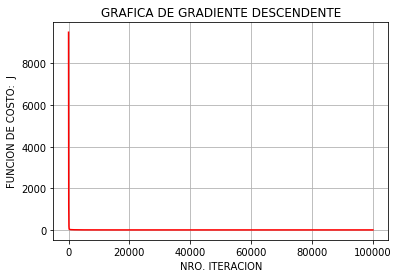

In [8]:
Theta_grad = gradient_descent(X,Y,0.01)

In [9]:
#PREDICCION DE VALORES DE Y
Yp1 = Xp@Theta_grad
Yp1 = np.around(Yp1,2)
for i in range(T):
    print(float(Yp1[i]))

105.21
142.67
132.94
129.7
